In [40]:
# 한글폰트 관련 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


# 데이터 수집 관련 라이브러리 
import requests, bs4
from lxml import html
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus, unquote

# 데이터분석 관련 라이브러리 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumBarunGothic') 
mpl.rc('axes', unicode_minus=False)

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [3]:
cd drive/MyDrive/부동산프로젝트

/content/drive/MyDrive/부동산프로젝트


In [4]:
df = pd.read_csv("final_df.csv")
df = df.drop(columns=['거래일'])
df.head(2)

,지역코드,법정동,아파트,지번,전용면적,층,건축년도,거래금액,자치구,거래연도,거래연월,KS11,KQ11,DJI,IXIC,VIX,CSI300,SSEC,DE30,FCHI,NG,GC,HG,CL,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리,소비자물가,- 농축수산물,- 공업제품,- 집세,- 공공서비스,- 개인서비스,근원물가,생활물가,인구이동(전입지별),유가증권시장
0,11110,내수동,경희궁의아침2단지,71,140.78,15,2004,130000,종로구,2018,2018-01,2522.90381,875.31,25850.645238,7291.614286,11.080952,4254.521905,3462.191905,13289.680476,5492.20381,3.167429,35.101905,3.318405,75.53619,2.19,2.44,2.63,2.72,1.66,1.49,1.5,0.8,-1.8,0.8,1.1,0.5,1.7,0.9,0.7,"119,120",613.3
1,11110,내수동,경희궁 파크팰리스,95,103.77,5,2003,96000,종로구,2018,2018-01,2522.90381,875.31,25850.645238,7291.614286,11.080952,4254.521905,3462.191905,13289.680476,5492.20381,3.167429,35.101905,3.318405,75.53619,2.19,2.44,2.63,2.72,1.66,1.49,1.5,0.8,-1.8,0.8,1.1,0.5,1.7,0.9,0.7,"119,120",613.3


In [5]:
# 데이터를 다시 불러오면서 type이 변경된 feature이 있습니다. 
# 이를 다시 정정해주도록 하겠습니다. 
df["인구이동(전입지별)"] = df["인구이동(전입지별)"].str.replace(",","").astype(int)

In [6]:
df['평단가'] = df['거래금액'] / df['전용면적']
df['거래횟수'] = 1
df.head(2)

,지역코드,법정동,아파트,지번,전용면적,층,건축년도,거래금액,자치구,거래연도,거래연월,KS11,KQ11,DJI,IXIC,VIX,CSI300,SSEC,DE30,FCHI,NG,GC,HG,CL,국고채 3년(평균),국고채 5년(평균),국고채 10년(평균),회사채 3년(평균),CD 91물(평균),"콜금리(1일물,평균)",기준금리,소비자물가,- 농축수산물,- 공업제품,- 집세,- 공공서비스,- 개인서비스,근원물가,생활물가,인구이동(전입지별),유가증권시장,평단가,거래횟수
0,11110,내수동,경희궁의아침2단지,71,140.78,15,2004,130000,종로구,2018,2018-01,2522.90381,875.31,25850.645238,7291.614286,11.080952,4254.521905,3462.191905,13289.680476,5492.20381,3.167429,35.101905,3.318405,75.53619,2.19,2.44,2.63,2.72,1.66,1.49,1.5,0.8,-1.8,0.8,1.1,0.5,1.7,0.9,0.7,119120,613.3,923.426623,1
1,11110,내수동,경희궁 파크팰리스,95,103.77,5,2003,96000,종로구,2018,2018-01,2522.90381,875.31,25850.645238,7291.614286,11.080952,4254.521905,3462.191905,13289.680476,5492.20381,3.167429,35.101905,3.318405,75.53619,2.19,2.44,2.63,2.72,1.66,1.49,1.5,0.8,-1.8,0.8,1.1,0.5,1.7,0.9,0.7,119120,613.3,925.122868,1


In [7]:
rank = pd.concat([df.groupby('자치구').mean()[["평단가",'거래금액']].sort_values('거래금액',ascending=False),
                          df.groupby('자치구').sum()[['거래횟수']]],
                          axis = 1).sort_values("거래횟수", ascending=False)

rank.head(20)

,평단가,거래금액,거래횟수
노원구,719.632300,45310.518652,24930
송파구,1416.986516,116817.008178,15040
강서구,853.406403,60720.017306,14735
구로구,692.629164,49678.507705,13173
성북구,765.792449,58597.555598,13112
강동구,1017.383567,74534.672980,12143
강남구,1960.150606,172381.659943,11998
도봉구,595.782907,40985.334089,11473
양천구,992.560950,79586.816031,11241
영등포구,1023.242360,77885.701169,9922


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


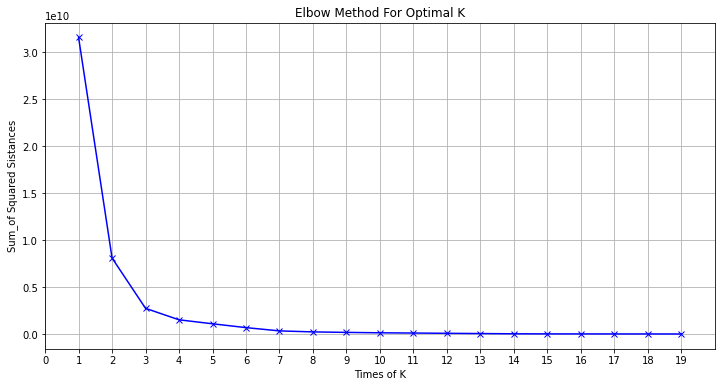

In [8]:
from sklearn.cluster import KMeans
sum_of_squared_distances = []
# df_kmeans = df_kmeans.drop('cluster',axis=1)
for n_k in range(1, 20) :
    num = KMeans(n_clusters = n_k)
    num = num.fit(rank[['평단가','거래금액']])
    sum_of_squared_distances.append(num.inertia_)

plt.figure(figsize=(12,6))

plt.xlim(0, 20)
plt.xticks(ticks=np.arange(0, 20, step=1))
plt.plot(range(1, 20), sum_of_squared_distances, 'bx-')
plt.xlabel('Times of K')
plt.ylabel('Sum_of Squared Sistances')
plt.title('Elbow Method For Optimal K')
plt.grid()
plt.show();

In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5)
kmeans.fit(rank)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
rank = rank.reset_index()

In [11]:
rank

,index,평단가,거래금액,거래횟수
0,노원구,719.632300,45310.518652,24930
1,송파구,1416.986516,116817.008178,15040
2,강서구,853.406403,60720.017306,14735
3,구로구,692.629164,49678.507705,13173
4,성북구,765.792449,58597.555598,13112
5,강동구,1017.383567,74534.672980,12143
6,강남구,1960.150606,172381.659943,11998
7,도봉구,595.782907,40985.334089,11473
8,양천구,992.560950,79586.816031,11241
9,영등포구,1023.242360,77885.701169,9922


In [12]:
# rank에 rank라는 feature로 kmeans.labels_ 넣어주고 map과 zip을 활용하여 df에도 넣어준다. 
rank['rank'] = kmeans.labels_
df["rank"] = df["자치구"].map(dict(zip(rank["index"], rank["rank"])))

In [13]:
target='거래금액'
train = df[(df.거래연월 != '2020-12')].copy()
test = df[(df.거래연월 == '2020-12')].copy()
print(train.shape,test.shape)
print(test.거래연월.value_counts())

X = train.drop(columns=target)
y = train[target]
X_test = test.drop(columns=target)
y_test = test[target]
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

(233058, 44) (7761, 44)
2020-12    7761
Name: 거래연월, dtype: int64


((186446, 43), (46612, 43), (186446,), (46612,))

In [14]:
!pip install category_encoders
!pip install optuna
!pip install eli5
!pip install shap

     |████████████████████████████████| 80 kB 5.3 MB/s 
     |████████████████████████████████| 302 kB 8.3 MB/s 
     |████████████████████████████████| 80 kB 12.0 MB/s 
     |████████████████████████████████| 164 kB 81.3 MB/s 
     |████████████████████████████████| 75 kB 5.1 MB/s 
     |████████████████████████████████| 141 kB 72.7 MB/s 
     |████████████████████████████████| 111 kB 76.4 MB/s 
     |████████████████████████████████| 49 kB 8.0 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=01ffc6143bd75433b6605988c65a3fb616b280f35536e7af1a522936acc3b4d8
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 106 kB 8.4 MB/s 
     |████████████████████████████████| 356 kB 7.6 MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491637 sha256=8914fa4afb0a35a3c39b71b0304360ac2f3032684226

In [15]:
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from category_encoders import OrdinalEncoder

from sklearn.linear_model import LinearRegression
from xgboost.sklearn import XGBModel
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna

In [16]:
encoder = OrdinalEncoder()
encodered_X_train = encoder.fit_transform(X_train)
encodered_X_val = encoder.transform(X_val)
encodered_X_test = encoder.transform(X_test)

In [17]:
pipe = LinearRegression()

pipe.fit(encodered_X_train, y_train)
print('훈련 R^2: ', pipe.score(encodered_X_train, y_train))
print('검증 R^2: ', pipe.score(encodered_X_val, y_val))
print('TEST R^2: ', pipe.score(encodered_X_test, y_test))

print('\n훈련 MAE: ', mean_absolute_error(pipe.predict(encodered_X_train), y_train))
print('검증 MAE: ', mean_absolute_error(pipe.predict(encodered_X_val), y_val))
print('TEST MAE: ', mean_absolute_error(pipe.predict(encodered_X_test), y_test))

훈련 R^2:  0.909334818868618
검증 R^2:  0.9075938881448234
TEST R^2:  0.9017560648141414

훈련 MAE:  8617.671941256449
검증 MAE:  8668.254844130508
TEST MAE:  10941.066991546204


In [18]:
pipe = XGBRegressor(n_jobs=-1, objective="reg:squarederror")

pipe.fit(encodered_X_train, y_train)
print('훈련 R^2: ', pipe.score(encodered_X_train, y_train))
print('검증 R^2: ', pipe.score(encodered_X_val, y_val))
print('TEST R^2: ', pipe.score(encodered_X_test, y_test))

print('\n훈련 MAE: ', mean_absolute_error(pipe.predict(encodered_X_train), y_train))
print('검증 MAE: ', mean_absolute_error(pipe.predict(encodered_X_val), y_val))
print('TEST MAE: ', mean_absolute_error(pipe.predict(encodered_X_test), y_test))

훈련 R^2:  0.9975870608983545
검증 R^2:  0.9974537097987243
TEST R^2:  0.9971135212033126

훈련 MAE:  1671.160029137018
검증 MAE:  1687.7035575859497
TEST MAE:  2325.6399743358215


In [35]:
pipe = LGBMRegressor(n_jobs=-1)

pipe.fit(encodered_X_train, y_train)
print('훈련 R^2: ', pipe.score(encodered_X_train, y_train))
print('검증 R^2: ', pipe.score(encodered_X_val, y_val))
print('TEST R^2: ', pipe.score(encodered_X_test, y_test))

print('\n훈련 MAE: ', mean_absolute_error(pipe.predict(encodered_X_train), y_train))
print('검증 MAE: ', mean_absolute_error(pipe.predict(encodered_X_val), y_val))
print('TEST MAE: ', mean_absolute_error(pipe.predict(encodered_X_test), y_test))

훈련 R^2:  0.9990140544710079
검증 R^2:  0.9987797099864408
TEST R^2:  0.9982068646198566

훈련 MAE:  856.7112307199084
검증 MAE:  896.5364675969086
TEST MAE:  1357.2027969473997


### xgboost 1차 튜닝


In [36]:
def xgb_hyper_tuning(trial,data=X,target=y):
    
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

  encoder = OrdinalEncoder()
  X_train = encoder.fit_transform(X_train)
  X_val = encoder.transform(X_val)
  
  params = {
      "n_estimators": trial.suggest_int("n_estimators",200,2000,100),
      "subsample": trial.suggest_discrete_uniform("subsample",0.6,1,0.1),
      "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree",0.6,1,0.1),
      "eta": trial.suggest_loguniform("eta",1e-3,0.1),
      "reg_alpha": trial.suggest_int("reg_alpha",1,50),
      "reg_lambda": trial.suggest_int("reg_lambda",5,100),
      "max_depth": trial.suggest_int("max_depth",5,20),
      "min_child_weight": trial.suggest_int("min_child_weight",5,20),
  }

  # warning 제거를 위해 objective='reg:squarederror' 사용
  model = XGBRegressor(**params, tree_method='gpu_hist', random_state=42, objective='reg:squarederror')
  model.fit(X_train, y_train, eval_set=[(X_val,y_val)],verbose = False, eval_metric='mae')

  y_preds = model.predict(X_val)
  loss = mean_absolute_error(y_val, y_preds)
  
  return loss

In [37]:
xgb_study = optuna.create_study(direction='minimize')
xgb_study.optimize(xgb_hyper_tuning, n_trials=100)
print('Number of finished trials:', len(xgb_study.trials))
print('Best trial: score {}, params {}'.format(xgb_study.best_trial.value, xgb_study.best_trial.params))

[I 2021-08-20 08:24:59,160] A new study created in memory with name: no-name-05e326bb-5503-4eae-99a8-a9d23083fa36
[I 2021-08-20 08:25:20,003] Trial 0 finished with value: 495.16612533429225 and parameters: {'n_estimators': 1200, 'subsample': 0.6, 'colsample_bytree': 1.0, 'eta': 0.07670238488437015, 'reg_alpha': 33, 'reg_lambda': 79, 'max_depth': 11, 'min_child_weight': 14}. Best is trial 0 with value: 495.16612533429225.
[I 2021-08-20 08:25:29,109] Trial 1 finished with value: 755.1471274361267 and parameters: {'n_estimators': 1700, 'subsample': 0.6, 'colsample_bytree': 0.9, 'eta': 0.007250080245713304, 'reg_alpha': 19, 'reg_lambda': 25, 'max_depth': 5, 'min_child_weight': 15}. Best is trial 0 with value: 495.16612533429225.
[I 2021-08-20 08:25:33,121] Trial 2 finished with value: 918.7546751368847 and parameters: {'n_estimators': 500, 'subsample': 0.6, 'colsample_bytree': 0.8, 'eta': 0.008954406761046809, 'reg_alpha': 12, 'reg_lambda': 32, 'max_depth': 6, 'min_child_weight': 20}. Best

Number of finished trials: 100
Best trial: score 398.49306999304093, params {'n_estimators': 1700, 'subsample': 1.0, 'colsample_bytree': 1.0, 'eta': 0.0014983021762452623, 'reg_alpha': 32, 'reg_lambda': 10, 'max_depth': 17, 'min_child_weight': 15}


In [38]:
OPTUNA_OPTIMIZATION = True
if OPTUNA_OPTIMIZATION:
    display(optuna.visualization.plot_optimization_history(xgb_study))
    display(optuna.visualization.plot_slice(xgb_study))
    display(optuna.visualization.plot_parallel_coordinate(xgb_study))

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


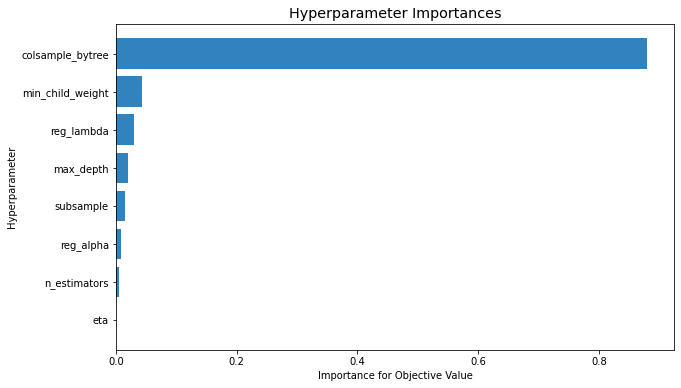

In [40]:
from matplotlib import rcParams
from optuna.visualization.matplotlib import plot_param_importances

rcParams['figure.figsize'] = 10, 6
plot_param_importances(xgb_study);

In [42]:
xgb_params = xgb_study.best_trial.params
xgb_params['tree_method'] = 'gpu_hist'
xgb_params['random_state'] = 42

xgb_tuning_model = XGBRegressor(n_jobs=-1, **xgb_params, objective='reg:squarederror')


xgb_tuning_model.fit(encodered_X_train, y_train)
print('훈련 R^2: ', xgb_tuning_model.score(encodered_X_train, y_train))
print('검증 R^2: ', xgb_tuning_model.score(encodered_X_val, y_val))
print('TEST R^2: ', xgb_tuning_model.score(encodered_X_test, y_test))

print('\n훈련 MAE: ', mean_absolute_error(xgb_tuning_model.predict(encodered_X_train), y_train))
print('검증 MAE: ', mean_absolute_error(xgb_tuning_model.predict(encodered_X_val), y_val))
print('TEST MAE: ', mean_absolute_error(xgb_tuning_model.predict(encodered_X_test), y_test))

훈련 R^2:  0.9999714249756106
검증 R^2:  0.9988971533973502
TEST R^2:  0.9985980264510345

훈련 MAE:  70.37470628381928
검증 MAE:  398.49306999304093
TEST MAE:  826.0565509085894


In [43]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(xgb_tuning_model, random_state=42).fit(encodered_X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
1.1007 ± 0.0283,평단가
0.9094 ± 0.0282,전용면적
0.0002 ± 0.0000,아파트
0.0002 ± 0.0002,층
0.0002 ± 0.0001,지번
0.0001 ± 0.0001,건축년도
0.0001 ± 0.0001,지역코드
0.0001 ± 0.0000,법정동
0.0000 ± 0.0000,rank
0.0000 ± 0.0000,자치구


### xgboost 2차 튜닝

In [19]:
def xgb_hyper_tuning_1(trial,data=X,target=y):
    
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

  encoder = OrdinalEncoder()
  X_train = encoder.fit_transform(X_train)
  X_val = encoder.transform(X_val)
  
  params = {
      # 200~2000 -> 1000~2500
      "n_estimators": trial.suggest_int("n_estimators",1000,2500,100),

      # 그대로 유지 
      "subsample": trial.suggest_discrete_uniform("subsample",0.6,1,0.1),

      # 0.6~1.0 / 0.1step -> 0.7~1.0 / 0.05step
      "colsample_bytree": trial.suggest_discrete_uniform("colsample_bytree",0.7,1,0.05 ),

      # 1e-3,0.1 -> 1e-3,0.01
      "eta": trial.suggest_loguniform("eta",1e-3,0.01),

      # 1,50 -> 1,40
      "reg_alpha": trial.suggest_int("reg_alpha",1,40),

      #5,100 -> 5,50
      "reg_lambda": trial.suggest_int("reg_lambda",5,50),

      #5,20 -> 10,25
      "max_depth": trial.suggest_int("max_depth",5,20),

      # 그대로 유지 
      "min_child_weight": trial.suggest_int("min_child_weight",5,20),
  }

  # warning 제거를 위해 objective='reg:squarederror' 사용
  model = XGBRegressor(**params, tree_method='gpu_hist', random_state=42, objective='reg:squarederror')
  model.fit(X_train, y_train, eval_set=[(X_val,y_val)],verbose = False, eval_metric='mae')

  y_preds = model.predict(X_val)
  loss = mean_absolute_error(y_val, y_preds)
  
  return loss

In [20]:
xgb_study1 = optuna.create_study(direction='minimize')
xgb_study1.optimize(xgb_hyper_tuning_1, n_trials=100)
print('Number of finished trials:', len(xgb_study1.trials))
print('Best trial: score {}, params {}'.format(xgb_study1.best_trial.value, xgb_study1.best_trial.params))

[I 2021-08-20 20:31:17,543] A new study created in memory with name: no-name-39025692-87bc-44ef-b3e4-c207ee26c0e2
[I 2021-08-20 20:31:39,341] Trial 0 finished with value: 455.8680779753269 and parameters: {'n_estimators': 1600, 'subsample': 0.9, 'colsample_bytree': 1.0, 'eta': 0.0016461794826469682, 'reg_alpha': 13, 'reg_lambda': 35, 'max_depth': 9, 'min_child_weight': 13}. Best is trial 0 with value: 455.8680779753269.
[I 2021-08-20 20:31:50,402] Trial 1 finished with value: 612.1338115008944 and parameters: {'n_estimators': 1000, 'subsample': 0.9, 'colsample_bytree': 0.8999999999999999, 'eta': 0.0010909054260797287, 'reg_alpha': 27, 'reg_lambda': 39, 'max_depth': 8, 'min_child_weight': 19}. Best is trial 0 with value: 455.8680779753269.
[I 2021-08-20 20:32:19,051] Trial 2 finished with value: 575.4962439782976 and parameters: {'n_estimators': 1200, 'subsample': 0.8, 'colsample_bytree': 0.85, 'eta': 0.00237027961037592, 'reg_alpha': 29, 'reg_lambda': 9, 'max_depth': 10, 'min_child_wei

Number of finished trials: 100
Best trial: score 398.73697662811816, params {'n_estimators': 2300, 'subsample': 1.0, 'colsample_bytree': 1.0, 'eta': 0.004511260106023914, 'reg_alpha': 14, 'reg_lambda': 20, 'max_depth': 17, 'min_child_weight': 9}


In [21]:
OPTUNA_OPTIMIZATION = True
if OPTUNA_OPTIMIZATION:
    display(optuna.visualization.plot_optimization_history(xgb_study1))
    display(optuna.visualization.plot_slice(xgb_study1))
    display(optuna.visualization.plot_parallel_coordinate(xgb_study1))

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


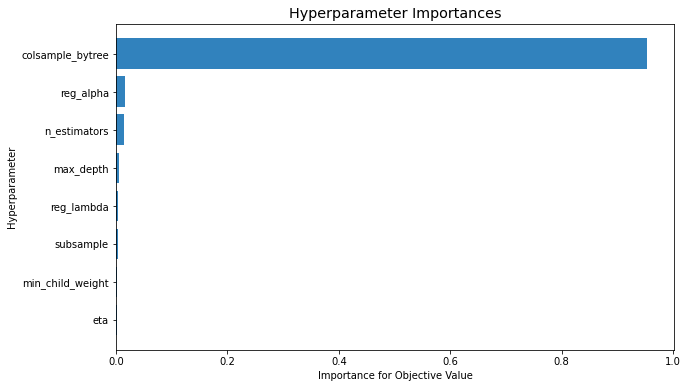

In [23]:
from matplotlib import rcParams
from optuna.visualization.matplotlib import plot_param_importances

rcParams['figure.figsize'] = 10, 6
plot_param_importances(xgb_study1);

In [24]:
xgb_params = xgb_study1.best_trial.params
xgb_params['tree_method'] = 'gpu_hist'
xgb_params['random_state'] = 42

xgb_tuning_model = XGBRegressor(n_jobs=-1, **xgb_params, objective='reg:squarederror')


xgb_tuning_model.fit(encodered_X_train, y_train)
print('훈련 R^2: ', xgb_tuning_model.score(encodered_X_train, y_train))
print('검증 R^2: ', xgb_tuning_model.score(encodered_X_val, y_val))
print('TEST R^2: ', xgb_tuning_model.score(encodered_X_test, y_test))

print('\n훈련 MAE: ', mean_absolute_error(xgb_tuning_model.predict(encodered_X_train), y_train))
print('검증 MAE: ', mean_absolute_error(xgb_tuning_model.predict(encodered_X_val), y_val))
print('TEST MAE: ', mean_absolute_error(xgb_tuning_model.predict(encodered_X_test), y_test))

훈련 R^2:  0.9999754965015961
검증 R^2:  0.9988868900787812
TEST R^2:  0.9985684348168018

훈련 MAE:  35.08948813115627
검증 MAE:  398.73697662811816
TEST MAE:  834.8261993687387


###LGIHTGBM

In [32]:
def lgb_hyper_tuning(trial,data=X,target=y):
    # 데이터 분리 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.1, random_state=42, shuffle=True)

    # 전처리 방법 선택 및 적용 
    encoder = OrdinalEncoder()
    X_train = encoder.fit_transform(X_train)
    X_val = encoder.transform(X_val)

    # 과적합을 방지하는 방향으로 하이퍼파라미터 튜닝
    params = {
    # gpu를 사용하도록 설정하는 코드 
    "tree_method": "gpu_hist", 
    
    # 몇개의 estimator를 만들지 설정하는 코드
    # 500~2000 -> 1500~2500, 그래프를 보고 변경함 
    'n_estimators': trial.suggest_int('n_estimators', 2000, 2500, 100),  
    
    # lightgbm이 사용할 수 있는 gbdt, rf, dart, goss 중 일반적인 gbdt를 사용함
    "booster": 'gbtree',  
    
    # 과적합을 방지하는 L2 정규화
    # 1~100 -> 20~100, , 그래프를 보고 변경함 
    "reg_lambda": trial.suggest_int("reg_lambda", 20, 60), 
    
    # 과적합을 방지하는 L1 정규화
    # 1~100 -> 1~50, , 그래프를 보고 변경함 
    "reg_alpha": trial.suggest_int("reg_alpha", 1, 40), 
    
    # 셈플링하는 코드 
    # 0.2~1.0 -> 0.4~1.0, 그래프를 보고 변경함 
    "subsample": trial.suggest_float("subsample", 0.9, 1.0), 
    
    # tree를 구성할 때 feature를 선택함
    # 최초 0.2~1.0으로 설정하였으나, 그래프를 보고 0.6~1.0으로 범위 설정 
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0, step=0.1),

    # 깊이를 얼마나 깊이 갈 것인지를 설정하는 코드 
    # 3~8  -> 3~20으로 변경 -> 사유 : 그래프가 대부분 8의 값을 가짐 
    "max_depth": trial.suggest_int("max_depth", 10, 25), 
    
    # 관측치에 대한 가중치 합의 최소를 말하지만 GBM에서는 관측치 수에 대한 최소를 의미함 
    # 2~10 -> 2~15로 변경, 그래프를 보고 변경함 
    "min_child_weight": trial.suggest_int("min_child_weight", 2, 15), 

    # 감마 값을 설정하는 코드 
    # 최초 0~20을 설정하였으나, 그래프를 보고 15로 줄임 
    "gamma": trial.suggest_float("gamma", 0, 15), 


    # 학습하는 속도 
    "learning_rate":0.01,

    # 과적합을 방지하는 정규화 방식으로 주로 L1, L2와 함께 사용됨 
    "min_gain_to_split" : trial.suggest_int("min_gain_to_split", 1, 100), 

    
    # # bagging을 가능하도록 하는 코드 0보다 커야함 
    # "bagging_freq": trial.suggest_int("bagging_freq", 1, 15),

    # # feature를 고르게 하는 코드 
    # "feature_fraction" : trial.suggest_float("feature_fraction", 0.0, 1.0),

}
    
    eval_set = [(X_val, y_val)]
    fit_params = dict(eval_set=eval_set, eval_metric='mae', 
                      early_stopping_rounds=100, verbose=False)
    
    # 모델 선정 및 params 입력 
    model = LGBMRegressor(**params,random_state=42)
    
    # 모델 훈련 
    model.fit(X_train,y_train,eval_set=[(X_val,y_val)],verbose = False)

    # 모델 예측 
    y_preds = model.predict(X_val)

    # rmse 계산 
    loss = mean_absolute_error(y_val, y_preds)
    
    return loss

In [33]:
study = optuna.create_study(direction='minimize')
study.optimize(lgb_hyper_tuning, n_trials=100)
print('Number of finished trials:', len(study.trials))
print('Best trial: score {}, params {}'.format(study.best_trial.value, study.best_trial.params))

[I 2021-08-21 01:44:22,456] A new study created in memory with name: no-name-1d22cf13-1ea4-4ce7-b074-89a9c561f6ee
[I 2021-08-21 01:45:17,662] Trial 0 finished with value: 673.8763811428523 and parameters: {'n_estimators': 2100, 'reg_lambda': 57, 'reg_alpha': 29, 'subsample': 0.916442954281757, 'colsample_bytree': 1.0, 'max_depth': 18, 'min_child_weight': 2, 'gamma': 6.860878068213948, 'min_gain_to_split': 75}. Best is trial 0 with value: 673.8763811428523.
[I 2021-08-21 01:46:27,479] Trial 1 finished with value: 1060.95258521851 and parameters: {'n_estimators': 2300, 'reg_lambda': 30, 'reg_alpha': 25, 'subsample': 0.9669098404930189, 'colsample_bytree': 0.7, 'max_depth': 23, 'min_child_weight': 12, 'gamma': 9.778247020995241, 'min_gain_to_split': 49}. Best is trial 0 with value: 673.8763811428523.
[I 2021-08-21 01:47:37,671] Trial 2 finished with value: 1231.8738625784458 and parameters: {'n_estimators': 2500, 'reg_lambda': 59, 'reg_alpha': 18, 'subsample': 0.9079623565236886, 'colsamp

Number of finished trials: 100
Best trial: score 597.7961435382506, params {'n_estimators': 2500, 'reg_lambda': 22, 'reg_alpha': 38, 'subsample': 0.9469884811164238, 'colsample_bytree': 1.0, 'max_depth': 24, 'min_child_weight': 12, 'gamma': 5.44319126507616, 'min_gain_to_split': 25}


In [28]:
OPTUNA_OPTIMIZATION = True
if OPTUNA_OPTIMIZATION:
    display(optuna.visualization.plot_optimization_history(study))
    display(optuna.visualization.plot_slice(study))
    display(optuna.visualization.plot_parallel_coordinate(study))

In [27]:
lgb_params = study.best_trial.params
lgb_params['tree_method'] = 'gpu_hist'
lgb_params['random_state'] = 42

pipe = make_pipeline(
    OrdinalEncoder(), 
    LGBMRegressor(n_jobs=-1, **lgb_params)
)

pipe.fit(X_train, y_train)
print('훈련 R^2: ', pipe.score(X_train, y_train))
print('검증 R^2: ', pipe.score(X_val, y_val))
print('TEST R^2: ', pipe.score(X_test, y_test))

print('\n훈련 MAE: ', mean_absolute_error(pipe.predict(X_train), y_train))
print('검증 MAE: ', mean_absolute_error(pipe.predict(X_val), y_val))
print('TEST MAE: ', mean_absolute_error(pipe.predict(X_test), y_test))

훈련 R^2:  0.9998113328576939
검증 R^2:  0.9990448646200042
TEST R^2:  0.9986162179119679

훈련 MAE:  392.0991339869203
검증 MAE:  523.5325329326428
TEST MAE:  948.39414406648


In [34]:
def lgb_hyper_tuning1(trial,data=X,target=y):
    # 데이터 분리 
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.1, random_state=42, shuffle=True)

    # 전처리 방법 선택 및 적용 
    encoder = OrdinalEncoder()
    X_train = encoder.fit_transform(X_train)
    X_val = encoder.transform(X_val)

    # 과적합을 방지하는 방향으로 하이퍼파라미터 튜닝
    params = {
    # gpu를 사용하도록 설정하는 코드 
    "tree_method": "gpu_hist", 
    
    # 몇개의 estimator를 만들지 설정하는 코드
    # 500~2000 -> 1500~2500, 그래프를 보고 변경함 
    'n_estimators': trial.suggest_int('n_estimators', 2000, 2500, 100),  
    
    # lightgbm이 사용할 수 있는 gbdt, rf, dart, goss 중 일반적인 gbdt를 사용함
    "booster": 'gbtree',  
    
    # 과적합을 방지하는 L2 정규화
    # 1~100 -> 20~100, , 그래프를 보고 변경함 
    "reg_lambda": trial.suggest_int("reg_lambda", 20, 60), 
    
    # 과적합을 방지하는 L1 정규화
    # 1~100 -> 1~50, , 그래프를 보고 변경함 
    "reg_alpha": trial.suggest_int("reg_alpha", 1, 40), 
    
    # 셈플링하는 코드 
    # 0.2~1.0 -> 0.4~1.0, 그래프를 보고 변경함 
    "subsample": trial.suggest_float("subsample", 0.9, 1.0), 
    
    # tree를 구성할 때 feature를 선택함
    # 최초 0.2~1.0으로 설정하였으나, 그래프를 보고 0.6~1.0으로 범위 설정 
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0, step=0.1),

    # 깊이를 얼마나 깊이 갈 것인지를 설정하는 코드 
    # 3~8  -> 3~20으로 변경 -> 사유 : 그래프가 대부분 8의 값을 가짐 
    "max_depth": trial.suggest_int("max_depth", 10, 25), 
    
    # 관측치에 대한 가중치 합의 최소를 말하지만 GBM에서는 관측치 수에 대한 최소를 의미함 
    # 2~10 -> 2~15로 변경, 그래프를 보고 변경함 
    "min_child_weight": trial.suggest_int("min_child_weight", 2, 15), 

    # 감마 값을 설정하는 코드 
    # 최초 0~20을 설정하였으나, 그래프를 보고 15로 줄임 
    "gamma": trial.suggest_float("gamma", 0, 15), 


    # 학습하는 속도 
    "learning_rate":0.01,

    # 과적합을 방지하는 정규화 방식으로 주로 L1, L2와 함께 사용됨 
    "min_gain_to_split" : trial.suggest_int("min_gain_to_split", 1, 100), 

    
    # # bagging을 가능하도록 하는 코드 0보다 커야함 
    "bagging_freq": trial.suggest_int("bagging_freq", 1, 15),

    # # feature를 고르게 하는 코드 
    "feature_fraction" : trial.suggest_float("feature_fraction", 0.6, 1.0),

}
    
    eval_set = [(X_val, y_val)]
    fit_params = dict(eval_set=eval_set, eval_metric='mae', 
                      early_stopping_rounds=100, verbose=False)
    
    # 모델 선정 및 params 입력 
    model = LGBMRegressor(**params,random_state=42)
    
    # 모델 훈련 
    model.fit(X_train,y_train,eval_set=[(X_val,y_val)],verbose = False)

    # 모델 예측 
    y_preds = model.predict(X_val)

    # rmse 계산 
    loss = mean_absolute_error(y_val, y_preds)
    
    return loss

In [35]:
lgb_study = optuna.create_study(direction='minimize')
lgb_study.optimize(lgb_hyper_tuning1, n_trials=100)
print('Number of finished trials:', len(lgb_study.trials))
print('Best trial: score {}, params {}'.format(lgb_study.best_trial.value, lgb_study.best_trial.params))

OPTUNA_OPTIMIZATION = True
if OPTUNA_OPTIMIZATION:
    display(optuna.visualization.plot_optimization_history(lgb_study))
    display(optuna.visualization.plot_slice(lgb_study))
    display(optuna.visualization.plot_parallel_coordinate(lgb_study))

lgb_params = lgb_study.best_trial.params
lgb_params['tree_method'] = 'gpu_hist'
lgb_params['random_state'] = 42

pipe = make_pipeline(
    OrdinalEncoder(), 
    LGBMRegressor(n_jobs=-1, **lgb_params)
)

pipe.fit(X_train, y_train)
print('훈련 R^2: ', pipe.score(X_train, y_train))
print('검증 R^2: ', pipe.score(X_val, y_val))
print('TEST R^2: ', pipe.score(X_test, y_test))

print('\n훈련 MAE: ', mean_absolute_error(pipe.predict(X_train), y_train))
print('검증 MAE: ', mean_absolute_error(pipe.predict(X_val), y_val))
print('TEST MAE: ', mean_absolute_error(pipe.predict(X_test), y_test))

[I 2021-08-21 03:42:28,634] A new study created in memory with name: no-name-79356377-8d99-449d-bac8-95ed48b48461
[I 2021-08-21 03:43:53,865] Trial 0 finished with value: 1167.108258167179 and parameters: {'n_estimators': 2200, 'reg_lambda': 26, 'reg_alpha': 38, 'subsample': 0.9694643478672696, 'colsample_bytree': 0.7, 'max_depth': 12, 'min_child_weight': 2, 'gamma': 6.91779154157207, 'min_gain_to_split': 91, 'bagging_freq': 14, 'feature_fraction': 0.6617982297331321}. Best is trial 0 with value: 1167.108258167179.
[I 2021-08-21 03:45:20,050] Trial 1 finished with value: 1280.8009129597556 and parameters: {'n_estimators': 2100, 'reg_lambda': 52, 'reg_alpha': 17, 'subsample': 0.9142354991743605, 'colsample_bytree': 0.7, 'max_depth': 17, 'min_child_weight': 5, 'gamma': 12.521144588016108, 'min_gain_to_split': 60, 'bagging_freq': 2, 'feature_fraction': 0.6194535709774976}. Best is trial 0 with value: 1167.108258167179.
[I 2021-08-21 03:46:49,873] Trial 2 finished with value: 819.890433712

Number of finished trials: 100
Best trial: score 639.3336118257737, params {'n_estimators': 2500, 'reg_lambda': 21, 'reg_alpha': 6, 'subsample': 0.9327545545810889, 'colsample_bytree': 0.6, 'max_depth': 25, 'min_child_weight': 13, 'gamma': 8.515880938666031, 'min_gain_to_split': 89, 'bagging_freq': 2, 'feature_fraction': 0.9897981609908014}


훈련 R^2:  0.9998328067729696
검증 R^2:  0.9990326267055646
TEST R^2:  0.998647893465513

훈련 MAE:  370.7554280714195
검증 MAE:  511.1232041128014
TEST MAE:  907.986265407554


In [36]:
model = pipe.steps[1][1]

In [37]:
!pip install shap
!pip install eli5

In [38]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=42).fit(encodered_X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
1.0995 ± 0.0323,평단가
0.9111 ± 0.0287,전용면적
0.0004 ± 0.0001,아파트
0.0003 ± 0.0000,건축년도
0.0002 ± 0.0002,층
0.0001 ± 0.0000,지번
0.0000 ± 0.0000,법정동
0.0000 ± 0.0001,지역코드
0.0000 ± 0.0000,자치구
0.0000 ± 0.0000,rank
